In the following, use: 

- sampling rate $sampling_r=1000$ Hz
- frequency $f = \frac{4}{\pi}$
- angular frequency $\omega = 2\pi f = 8$ 
- acquisition time $time_m = 2\pi$


<font color='blue'>We thus consider the signal y=$\sin(8 t)$ <img src="sinewavefunction.png">. 

</font>

# Working with Numpy FFT


## Prerequisites
Before proceeding with this lab make sure you are familiar with the <b>sampling theorem</b> and <b>the concept of aliasing</b>

Imports
-------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Create a Test Signal
--------------------
$sampling_r$ is the sampling rate, while $f$ is a base frequency for the signal content (and $\omega = 2\pi f$ the angular frequency we used in the definition of the Fourier Transform). We create a signal that contains components at a couple of multiples of $f$. Note the amplitudes here, since we will be trying to extract those correctly from the FFT later.

In [2]:
## We deal with the time first
### COMPLETE HERE ###

## sampling rate in Hz 
sampling_r = 1000

## acquisition time
time_m = 5.2 #time in seconds

## sampling from 0 to t_max at the rate sampling_r
time = np.arange(0, time_m , 1/sampling_r)

## print the number of samples
print("We consider %d samples"% time.size )

We consider 5200 samples


In [3]:
## Then we set up the signal we want
### COMPLETE HERE ###

## considere angular_frequency
omega = 8

## frequency in Hz
f = 10 / np.pi

## function
y = np.sin(f*2*np.pi*time)



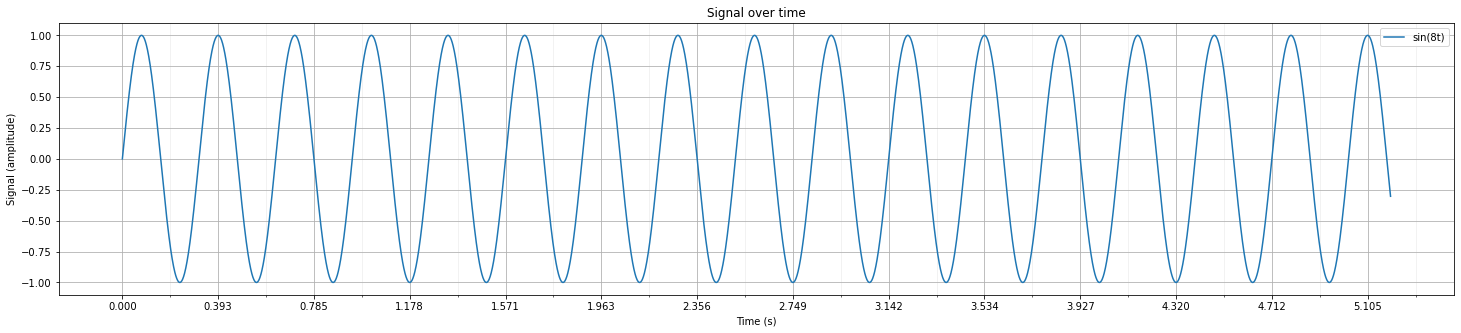

In [4]:
### COMPLETE HERE ###
## plot the signal vs time - Label the axes!

# grid scaling for plot
scaling = 0.0625
major_ticks = np.arange(0, time_m + 1, np.pi * scaling *2 )
minor_ticks = np.arange(0, time_m + 1, np.pi * scaling )
fig = plt.figure(figsize=[25,5])

 # nice plot settings
ax = fig.add_subplot(1,1,1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal (amplitude)')
ax.set_title('Signal over time')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=1)  

ax.plot( time,y, label="sin(8t)" ) 
ax.legend()
plt.show()




Compute the FFT
---------------
Using the ${\tt numpy}$ library, compute:

<ul>
    <li>the FFT</li>
    <li>its matching vector of frequencies (np.fft.fftfreq)</li>
    <li>the inverse FFT (back to the signal)</li>
</ul>

In [5]:
### COMPLETE HERE ###
n = y.size ## number of samples

## array of fft(y)
fft_y = np.fft.fft(y) 

## array of frequencies values
freq = np.fft.fftfreq(n=n,d=time[1]-time[0])

## estimate y through inverse FFT
y_est = np.fft.ifft(fft_y)

freq.size

5200

## Plot your results

<font color='blue'>Think even if you do not plot! <b>What do you expect?</b> Recall that the sinewave is and odd function.</font>

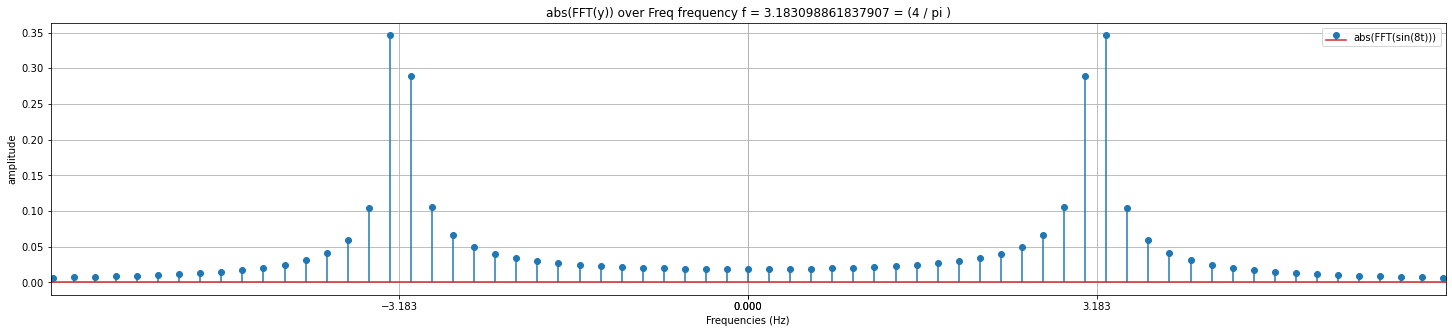

In [6]:
## complete here - plot the abs of FFT(y)
fig = plt.figure(figsize=[25,5])
xlimit = 2*f
# nice plot settings
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('amplitude')
ax.set_title('abs(FFT(y)) over Freq frequency f = {} = (4 / pi )'.format(f))
ax.set_xlim(-xlimit,xlimit)
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))

labels  = ["{} f".format(i) for i,v in enumerate(ptick)]
ax.set_xticks(ptick)
#ax.set_xticklabels(labels)
ax.grid()
ax.stem( freq,np.abs(fft_y) / len(y), label="abs(FFT(sin(8t)))" ) 
ax.legend()
plt.show()

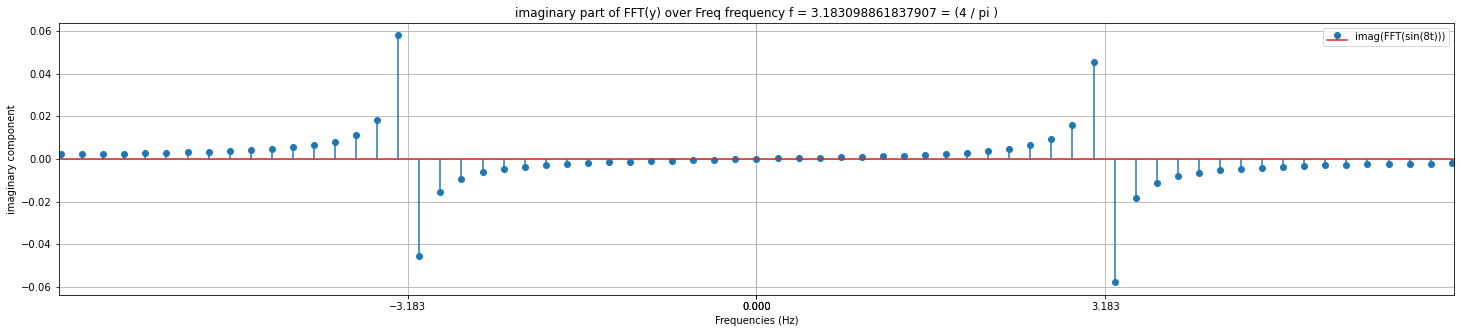

In [7]:
## complete here - plot the imaginary part of FFT(y)

fig = plt.figure(figsize=[25,5])
#xlimit = 1.5*f
# nice plot settings
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('imaginary component')
ax.set_title('imaginary part of FFT(y) over Freq frequency f = {} = (4 / pi )'.format(f))
ax.set_xlim(-xlimit,xlimit)
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))

labels  = ["{} f".format(i) for i,v in enumerate(ptick)]
ax.set_xticks(ptick)
#ax.set_xticklabels(labels)
ax.grid()
ax.stem( freq,fft_y.imag / len(y), label="imag(FFT(sin(8t)))" ) 
ax.legend()
plt.show()

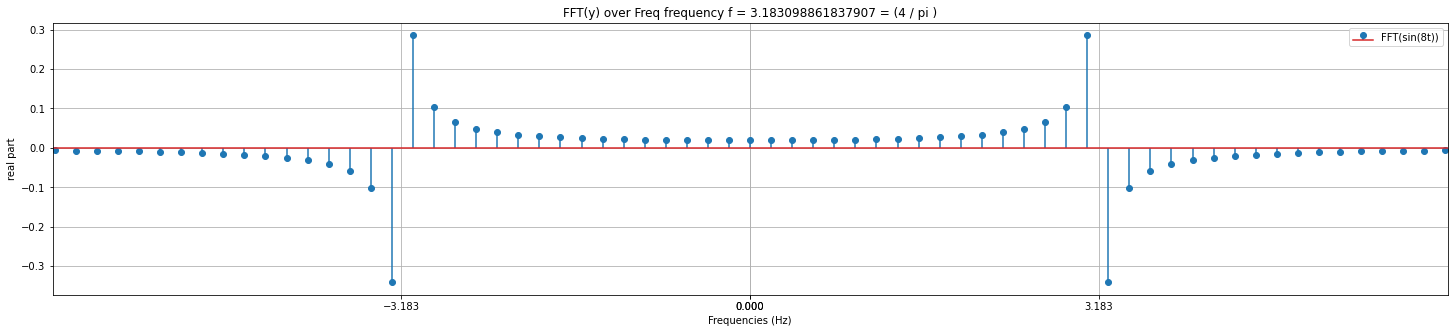

In [8]:
## complete here - plot the real part of FFT(y)

fig = plt.figure(figsize=[25,5])
#xlimit = 2*f
# nice plot settings
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Frequencies (Hz)')
ax.set_ylabel('real part')
ax.set_title('FFT(y) over Freq frequency f = {} = (4 / pi )'.format(f))
ax.set_xlim(0,xlimit)
ax.set_xlim(-xlimit,xlimit)
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))
ax.set_xticks(ptick)

ax.grid()
ax.stem( freq,np.real(fft_y)/ len(y), label="FFT(sin(8t))" ) 
ax.legend()
plt.show()

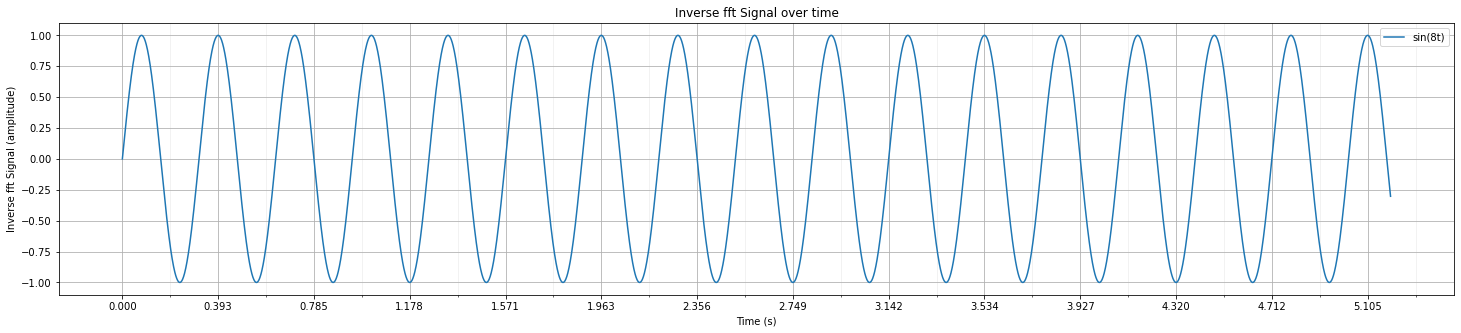

In [9]:
## complete here - plot the signal estimated through the Inverse FFT

# grid scaling for plot
scaling = 0.0625
major_ticks = np.arange(0, time_m + 1, np.pi * scaling *2 )
minor_ticks = np.arange(0, time_m + 1, np.pi * scaling )
fig = plt.figure(figsize=[25,5])

 # nice plot settings
ax = fig.add_subplot(1,1,1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Inverse fft Signal (amplitude)')
ax.set_title('Inverse fft Signal over time')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=1)  

ax.plot( time, np.real(y_est) , label="sin(8t)" ) 
ax.legend()
plt.show()

C:\Users\andres.coronado\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


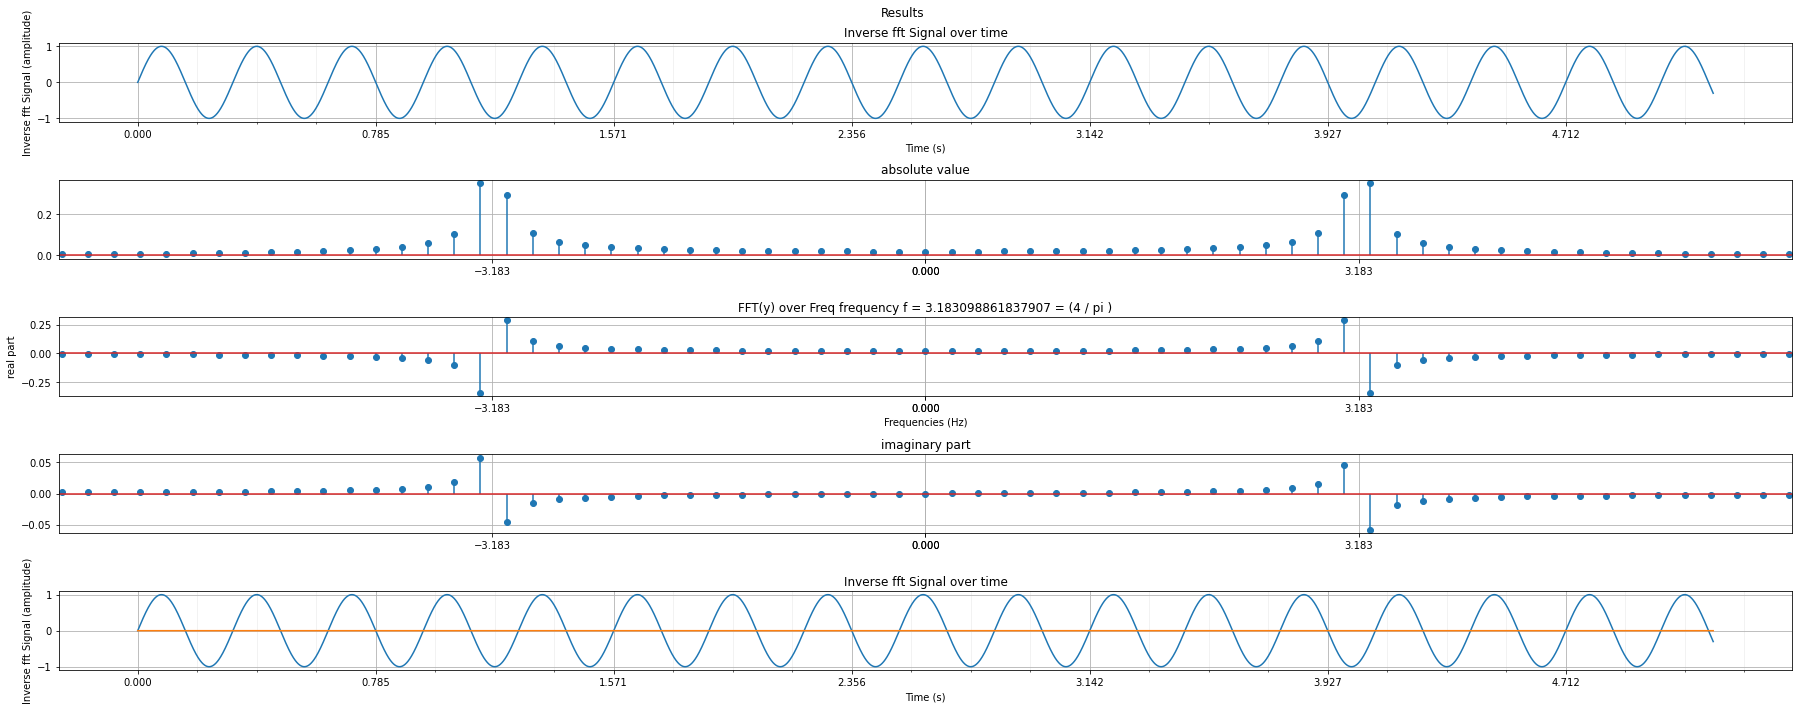

In [10]:
# grid scaling for plot
scaling = 0.0625
major_ticks = np.arange(0, time_m + 1, np.pi * scaling *4 )
minor_ticks = np.arange(0, time_m + 1, np.pi * scaling )
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))
fig, axs = plt.subplots(5,sharex=False, sharey=False,figsize=[25,10])
fig.suptitle('Results')
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))

axs[0].set_title('Inverse fft Signal over time')
axs[0].grid(which='minor', alpha=0.2)
axs[0].grid(which='major', alpha=1)
axs[0].set_xticks(major_ticks)
axs[0].set_xticks(minor_ticks, minor=True)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Inverse fft Signal (amplitude)')

axs[4].set_title('Inverse fft Signal over time')
axs[4].grid(which='minor', alpha=0.2)
axs[4].grid(which='major', alpha=1)
axs[4].set_xticks(major_ticks)
axs[4].set_xticks(minor_ticks, minor=True)
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Inverse fft Signal (amplitude)')

axs[1].set_title("absolute value")
axs[1].set_xlim(-xlimit,xlimit)
axs[1].set_title("absolute value")
axs[1].set_xticks(ptick)
axs[1].grid()


axs[2].set_xticks(ptick)
axs[2].set_xlim(-xlimit,xlimit)
axs[2].set_title("real part")
axs[2].set_xlabel('Frequencies (Hz)')
axs[2].set_ylabel('real part')
axs[2].set_title('FFT(y) over Freq frequency f = {} = (4 / pi )'.format(f))
axs[2].set_xlim(-xlimit,xlimit)
axs[2].set_xticks(ptick)
axs[2].grid()

axs[3].set_title("imaginary part")
axs[3].set_xlim(-xlimit,xlimit)
axs[3].set_xticks(ptick)
axs[3].set_xticks(ptick)
axs[3].grid()

axs[0].plot(time, y)
axs[4].plot(time,y_est)
axs[4].plot(time,np.imag(y_est))

axs[2].stem(freq, np.real(fft_y)/len(y))
axs[3].stem(freq, np.imag(fft_y)/len(y))
axs[1].stem(freq, np.abs(fft_y)/len(y))
fig.tight_layout()

## Some more fun... (part 1)

<font color='blue'>Is this what you expected? If we consider an acquisition time which is not a multiple of $2\pi$, do you expect any change in the FFT?

Complete the exercise:

<ol>
    <li>Instead of using time=$[0,2\pi]$, choose a time interval that is not a multiple of the sine wave period. How does this affect the results above? </li> 
</ol></font>

## Verify Parseval

Now we want to verify that the Parseval equality holds. We first compute the energy of the signal y, then we compute the energy of the fft(y). 

We normalize once w.r.t. to the number of samples following <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform#The_Plancherel_theorem_and_Parseval's_theorem" target="_blank">this notation</a>. 

In [11]:
## makes use of the np.vdot function, which computes the inner product between complex numbers

def squared_norm(func):
    return np.vdot(func,func)

In [12]:
## parseval - norm of the function

## to evaluate the inner product we make use of the squared_norm function
norm_y = squared_norm(y)
norm_y

2592.3359455277914

In [13]:
## parseval - sum of the squared coefficients of the series

## KEEP IN MIND THE NORMALIZATION IN THE PARSEVAL EQUALITY
norm_fft_y = squared_norm(fft_y)*( 1 / len(time))
norm_fft_y

(2592.3359455277923+0j)

In [14]:
## sanity check - compute the norm of the signal obtained by using the inverse fourier transform
norm_y_est =  squared_norm(y_est)
norm_y_est

(2592.3359455277905+0j)

<font color='blue'>Is this what you expected? </font>

In [15]:
len (time)

5200

## Let's do it for another signal

We will consider now $\frac{sin^2(at)}{a\pi t^2}$.

Recall the Fourier pair for this signal: 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/231cdda1f8c22eff1cf11386602d76cb78daebc6">

Set y as a squared sinc with a = 150. Beware of the division by zero in t=0. </font>

In [28]:
sampling_r = 5
time_m = 1 #time in seconds
time = np.arange(-time_m, time_m , 1/sampling_r)
print("We consider %d samples"% time.size )
omega = 8

## complete here - compute the fft(y)
n = y.size ## number of samples
a = 150 
epsilon = 0.00000000001
y = np.array([(np.sin(a*t)**2)/(a*np.pi*(t**2 )) for t in (time + epsilon)])

We consider 10 samples


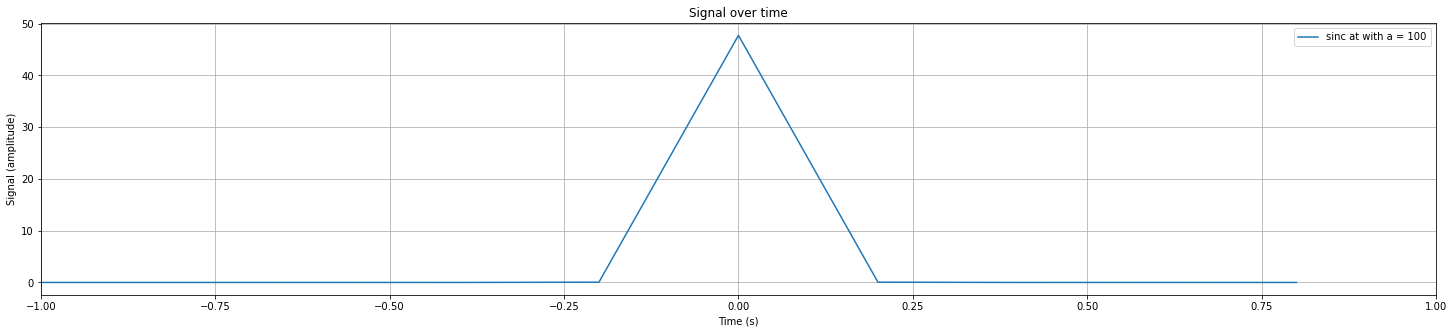

In [29]:
## complete here - plot the signal 
scaling = 0.0625
fig = plt.figure(figsize=[25,5])
 # nice plot settings
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal (amplitude)')
ax.set_title('Signal over time')
ax.grid()
ax.set_xlim(-time_m,time_m+epsilon)
ax.plot( time+epsilon,y, label="sinc at with a = 100" ) 
ax.legend()
plt.show()

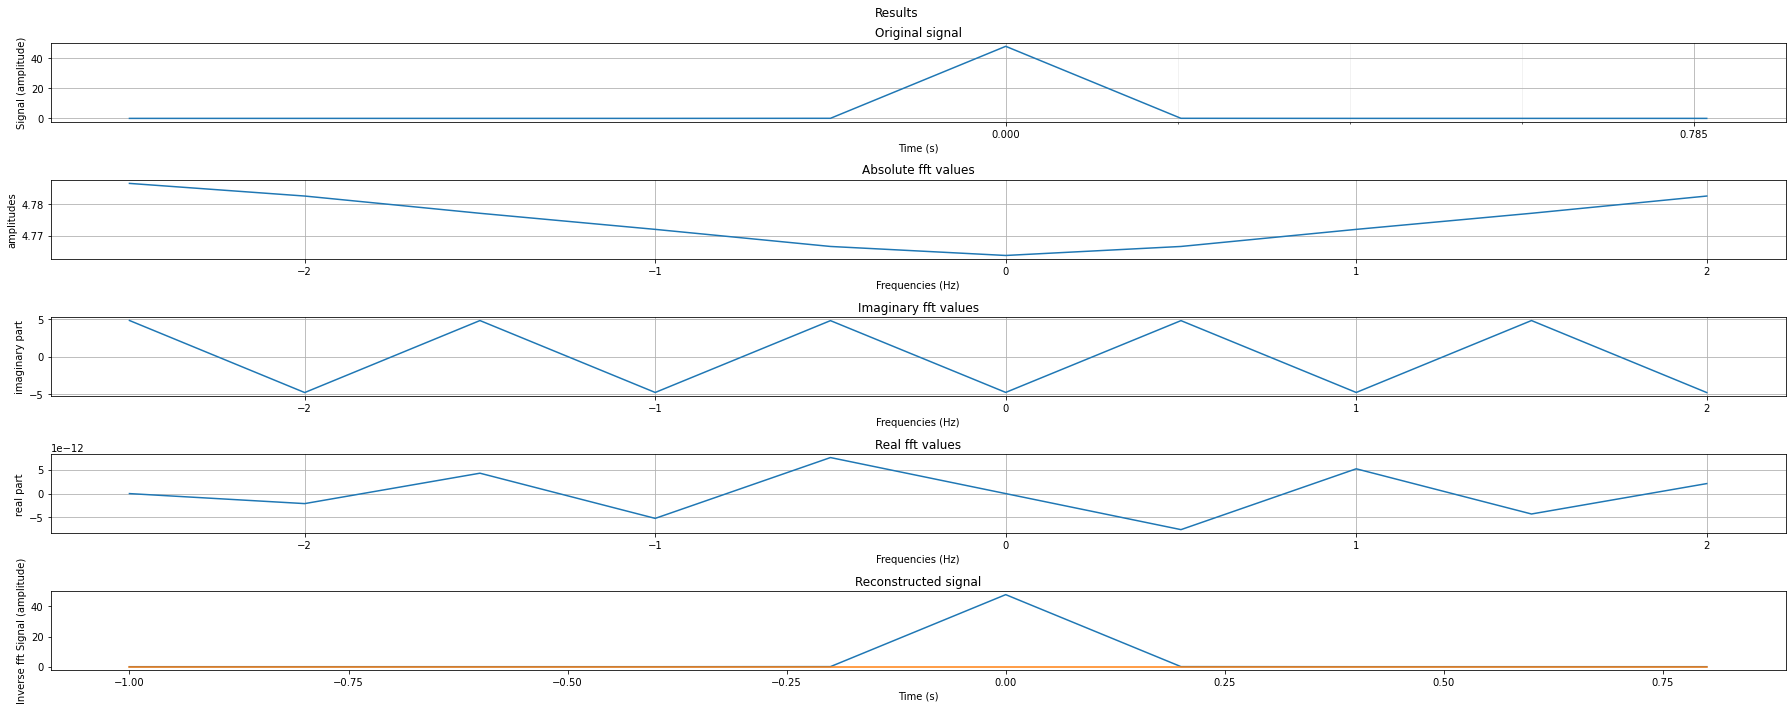

In [30]:
n = time.size
fft_y = np.fft.fft(y, n =n) 
freq = np.fft.fftfreq(n=n,d=time[1]-time[0])
y_est = np.fft.ifft(fft_y, n=n)

xlimit = 0.5
scaling = 0.0625
major_ticks = np.arange(0, time_m + 1, np.pi * scaling *4 )
minor_ticks = np.arange(0, time_m + 1, np.pi * scaling )
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))
fig, axs = plt.subplots(5,sharex=False, sharey=False,figsize=[25,10])
fig.suptitle('Results')
ptick = np.append(np.arange(0,-xlimit,-f),(np.arange(0,xlimit,f)))

axs[0].set_title('Original signal')
axs[0].grid(which='minor', alpha=0.2)
axs[0].grid(which='major', alpha=1)
axs[0].set_xticks(major_ticks)
axs[0].set_xticks(minor_ticks, minor=True)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Signal (amplitude)')
axs[0].plot(time, y)

axs[1].set_title('Absolute fft values')
axs[1].set_xlabel('Frequencies (Hz)')
axs[1].set_ylabel('amplitudes')
axs[1].grid()
axs[1].plot(np.fft.fftshift(freq), abs(fft_y)/len(y))

axs[2].set_title('Imaginary fft values')
axs[2].set_ylabel('imaginary part')
axs[2].set_xlabel('Frequencies (Hz)')
axs[2].grid()
axs[2].plot(np.fft.fftshift(freq), np.real(fft_y)/len(y))

axs[3].set_title('Real fft values')
axs[3].set_xlabel('Frequencies (Hz)')
axs[3].set_ylabel('real part')
axs[3].grid()
axs[3].plot(np.fft.fftshift(freq), np.imag(fft_y)/len(y))

axs[4].set_title('Reconstructed signal')
axs[4].plot(time,y_est.real)
axs[4].plot(time,y_est.imag)

axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Inverse fft Signal (amplitude)')

fig.tight_layout()

## Some more fun... (part 2)

<font color='blue'>Complete the exercise:

<ol>
    <li>Note that frequencies in the FFT and the `freq` vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum. Plot the spectrum of the FFT <b>adjusting</b> the frequecies (make use of the ${\tt np.fft.fftshift}$ function) </li>    
    <li>Try varying the <i>sampling rate</i> $sampling_r$ until the FFT is clearly affected by <i>aliasing</i>     </li>   
</ol></font>

In [31]:
np.fft.fftshift(freq)


array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])